In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Acquiring Data:

In [5]:
df = pd.read_csv('clean_weather_df.csv',index_col='datetime',parse_dates=['datetime'])

In [6]:
df.head(2)

,hs_temp,hs_feelslike,hs_dew,hs_humidity,hs_precip,hs_windgust,hs_windspeed,hs_winddir,hs_sealevelpressure,hs_cloudcover,...,vc_precip,vc_windgust,vc_windspeed,vc_winddir,vc_sealevelpressure,vc_cloudcover,vc_visibility,vc_solarradiation,vc_solarenergy,vc_uvindex
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,47.3,41.2,43.2,85.37,0.0,27.5,15.1,330.0,1025.6,100.0,...,0.0,24.2,16.1,360.0,1027.7,98.7,9.9,0.0,NaN,0.0
2010-01-01 01:00:00,46.8,39.9,41.4,81.38,0.0,24.2,17.6,347.0,1026.6,100.0,...,0.0,26.5,15.1,350.0,1028.1,98.6,9.9,0.0,NaN,0.0


# Exploring the Data:

## Key Questions:
- What does seasonality look like over time?
    - It is expected that there will be seasonal trends for years. Visualize it.
    - Are there larger seasonal trends, such as multi-year cycles?
- Has there been a significant upward trend in temperatures over the years?
    - Are there other trends that may or may not be related to this (e.g. less precipitation, more wind, etc.)?

### Seasonality:

#### Temperatures:

<AxesSubplot:xlabel='datetime'>

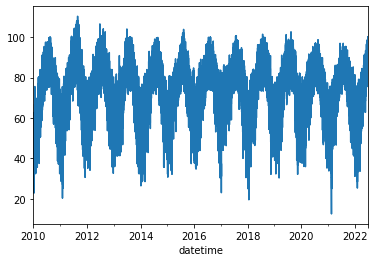

In [7]:
#Houston:

df.hs_temp.plot()

<AxesSubplot:xlabel='datetime'>

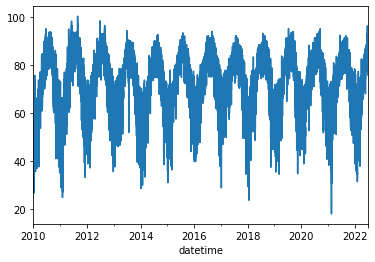

In [8]:
# Galveston:
df.gv_temp.plot()

<AxesSubplot:xlabel='datetime'>

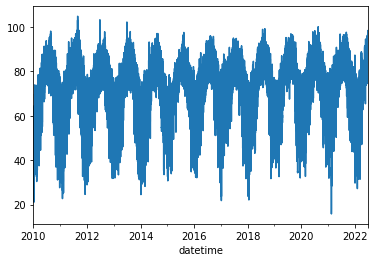

In [10]:
#Port Lavaca

df.pl_temp.plot()

<AxesSubplot:xlabel='datetime'>

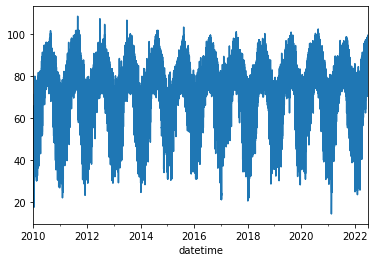

In [11]:
df.vc_temp.plot()

#### Humidity:

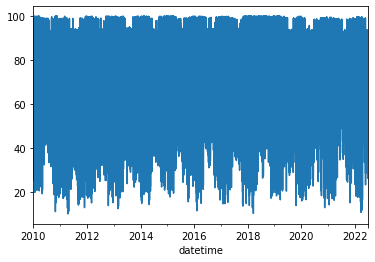

In [13]:
# Houston:

df.hs_humidity.plot();

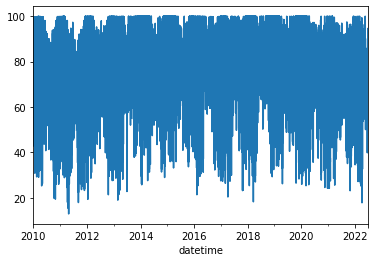

In [14]:
# Galveston:

df.gv_humidity.plot();

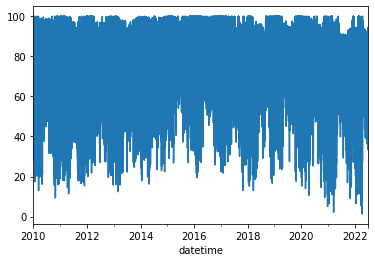

In [15]:
# Port Lavaca:

df.pl_humidity.plot();

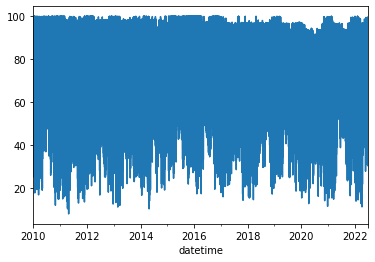

In [17]:
# Victoria:

df.vc_humidity.plot();